<a href="https://colab.research.google.com/github/MicheleSimo/Collection_for_my_progress/blob/main/EDA_su_veicoli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Eda su un dataset contenente informazioni su veicoli

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

Caricamento file e output di vari informazioni generiche.
In aggiunta vengono raccolte le colonne categoriche e quelle numeriche dal momento che la versione originale del dataset contiene tanti valori nulli, quindi si applica il data cleaning per far rendere il dataset molto piu'decifrabile anche per i modelli di intelligenza artificiale



In [3]:
df = pd.read_csv("electric_vehicles_spec_2025.csv.csv")
print(df.info())
#Sezione Data analysis
print(df.shape)
print(df.isnull().sum())
Categoriche = df.select_dtypes(include="object").columns
Numeri = df.select_dtypes(include=["int64","float64"]).columns
df[Numeri] = df[Numeri].apply(lambda x : x.fillna(x.mean()))
df[Categoriche] = df[Categoriche].apply(lambda x : x.fillna(x.mode()[0]))
print(df.isnull().sum())
print(df["model"].value_counts())
print(df["model"].unique())
print(df["brand"].value_counts())
print(df["brand"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

Viene aggiunta una nuova colonna che in realtà non è altro che una colonna esistente alterata per ampliare le analisi.Poi ho deciso di creare una copia del dataframe contenente solamente i Brand con occorrenza di almeno pari a 20.


In [4]:
df["Range_categorizzato"] = pd.cut(df["range_km"],bins=5).astype(str)
print(df.info())
MostFrequentBrand = list(df["brand"].value_counts().index[df["brand"].value_counts() >= 20])
print(MostFrequentBrand)
df2 = df[df["brand"].isin(MostFrequentBrand)]
print(df2["brand"].unique())
print(df2["model"].unique())
MustangAuto = df2[df2["model"].str.contains("Mustang")]
print(MustangAuto["model"].unique())
print(MustangAuto["torque_nm"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      478 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            478 non-null    float64
 6   torque_nm                  478 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  478 non-null    float64
 11  fast_charge_port           478 non-null    object 
 12  towing_capacity_kg         478 non-null    float64
 13  cargo_volume_l             478 non-null    object 

Data analysis

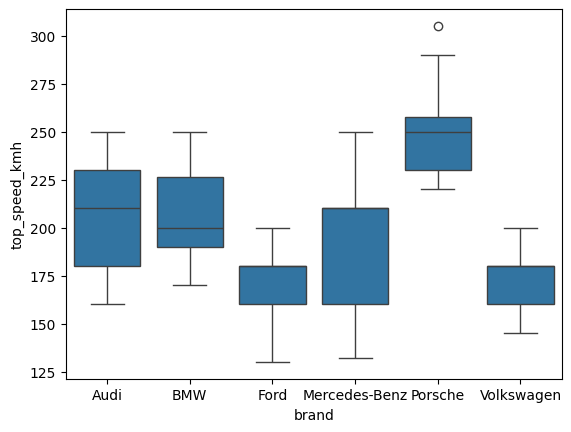

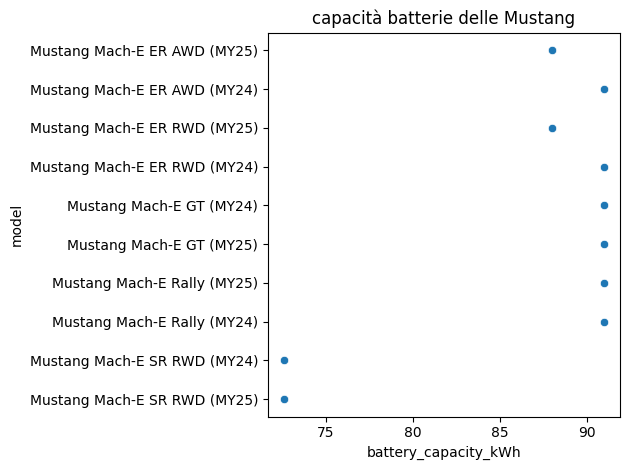

['Lithium-ion']
battery_type
Lithium-ion    478
Name: count, dtype: int64


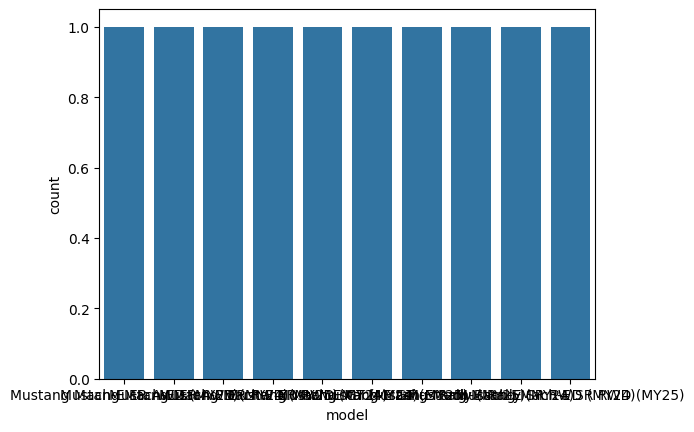

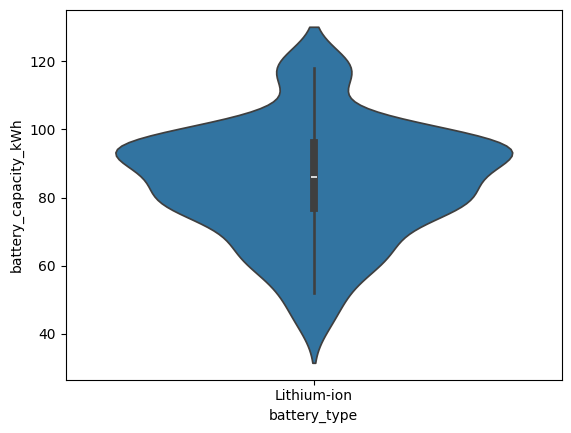

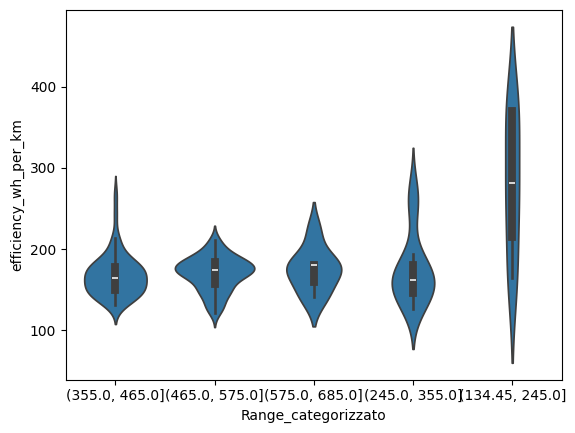

In [5]:
sns.boxplot(data=df2,x="brand",y="top_speed_kmh")
plt.show()
sns.scatterplot(data=MustangAuto,x="battery_capacity_kWh",y="model")
plt.title("capacità batterie delle Mustang")
plt.tight_layout()
plt.show()
print(df["battery_type"].unique())
print(df["battery_type"].value_counts())
sns.countplot(data=MustangAuto,x="model")
plt.show()
sns.violinplot(data=df2,x="battery_type",y="battery_capacity_kWh")
plt.show()
sns.violinplot(data=df2,x="Range_categorizzato",y="efficiency_wh_per_km")
plt.show()

Machine learning:

In [6]:
#Sezione Machine Learning
LE = LabelEncoder()
Lista2 = df2.select_dtypes(include="object").columns
print(Lista2)
for i in Lista2:
    df2[i] = LE.fit_transform(df2[i])
X = df2.drop("brand",axis=1)
print(X.isnull().sum())
y = df2["brand"]
albero = DecisionTreeClassifier()
vicinanza = KNeighborsClassifier()



param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 15, 20, 30],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 10],
    "max_features": [None, "sqrt", "log2"],
    "class_weight": [None, "balanced"]
}
param_grid2 = {
    "n_neighbors": list(range(1, 21, 2)),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "chebyshev"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
}
X_train,X_test,y_train,y_test = train_test_split(X,y)
gs = GridSearchCV(vicinanza,param_grid=param_grid2,cv=5,scoring="accuracy")
gs.fit(X_train,y_train)
print(gs.best_params_)
print(gs.best_score_)

Index(['brand', 'model', 'battery_type', 'fast_charge_port', 'cargo_volume_l',
       'drivetrain', 'segment', 'car_body_type', 'source_url',
       'Range_categorizzato'],
      dtype='object')
model                        0
top_speed_kmh                0
battery_capacity_kWh         0
battery_type                 0
number_of_cells              0
torque_nm                    0
efficiency_wh_per_km         0
range_km                     0
acceleration_0_100_s         0
fast_charging_power_kw_dc    0
fast_charge_port             0
towing_capacity_kg           0
cargo_volume_l               0
seats                        0
drivetrain                   0
segment                      0
length_mm                    0
width_mm                     0
height_mm                    0
car_body_type                0
source_url                   0
Range_categorizzato          0
dtype: int64


/tmp/ipython-input-6-3103550180.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i] = LE.fit_transform(df2[i])
/tmp/ipython-input-6-3103550180.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i] = LE.fit_transform(df2[i])
/tmp/ipython-input-6-3103550180.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

{'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
0.8666666666666666
